In [1]:
import numpy as np
import matplotlib.pyplot as mtb
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [4]:
data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [5]:
data.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
data=data.drop('Accident_ID',axis=1)

In [8]:
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [9]:
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(data[['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
sd=scaler.transform(data[['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric']])

In [13]:
sd=pd.DataFrame(sd,columns=['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric'])

In [14]:
notscaled=[]
for x in data.columns:
    if(x not in ['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric','Severity']):
        notscaled.append(x)

In [15]:
notscaled

['Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Accident_Type_Code',
 'Violations']

In [16]:
sd=pd.concat([sd,data[notscaled]],axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lm=LabelEncoder()

In [19]:
labels=lm.fit(data['Severity'])

In [20]:
labels=lm.transform(data['Severity'])

In [21]:
labels=pd.DataFrame(labels,columns=['Severity'])

In [22]:
datascaled=pd.concat([labels,sd],axis=1)

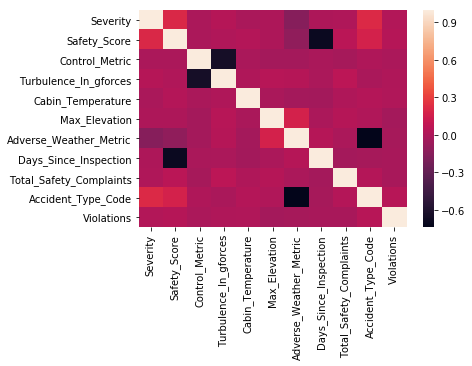

In [23]:
sns.heatmap(datascaled.corr())

In [ ]:
#sadly no correlations

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [26]:
lr=LGBMClassifier(n_estimators=1000)

In [27]:
x_train, x_test, y_train, y_test=train_test_split(datascaled.iloc[:,1:],datascaled.iloc[:,0],test_size=0.1,random_state=322)

In [29]:
from sklearn.model_selection import KFold,cross_val_score

In [30]:
kf=KFold(n_splits=10,shuffle=True,random_state=101)

In [31]:
cross_val_score(lr,datascaled.iloc[:,1:],datascaled.iloc[:,0],cv=kf)

array([0.967, 0.963, 0.958, 0.956, 0.959, 0.963, 0.97 , 0.964, 0.972,
       0.97 ])

In [32]:
lr.fit(datascaled.iloc[:,1:],datascaled.iloc[:,0])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
predict=lr.predict(x_test)

In [34]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(lr.predict(datascaled.iloc[:,1:]),datascaled.iloc[:,0]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3049
           1       1.00      1.00      1.00      2527
           2       1.00      1.00      1.00      1695
           3       1.00      1.00      1.00      2729

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [37]:
test=pd.read_csv('test.csv')

In [38]:
test=test.drop(['Accident_ID'],axis=1)

In [39]:
testscaled=pd.DataFrame(columns=['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric'],data=scaler.transform(test[['Safety_Score','Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric']]))

In [40]:
test=pd.concat([testscaled,test[notscaled]],axis=1)

In [41]:
test.head()

,Safety_Score,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric,Days_Since_Inspection,Total_Safety_Complaints,Accident_Type_Code,Violations
0,-1.386771,0.589614,0.061532,-0.597670,0.630643,-0.487898,16,6,4,2
1,1.009905,-0.047136,-1.077161,-0.496206,-0.191591,-0.663478,15,3,7,2
2,-0.532230,-0.035629,-0.369566,2.533217,-1.529857,-0.659440,15,3,6,1
3,-2.391281,0.102462,0.332084,0.322753,0.870208,-0.146006,21,5,3,2
4,-1.921566,-0.760604,-0.562817,-0.271536,0.370430,0.598414,18,2,2,2


In [42]:
predict=lr.predict(test)

In [43]:
predict=lm.inverse_transform(predict)

In [44]:
predict=pd.DataFrame(predict,columns=['Severity'])

In [45]:
test=pd.read_csv('test.csv')

In [46]:
result=pd.concat([test['Accident_ID'],predict],axis=1)

In [47]:
result['Accident_ID']=np.array(result['Accident_ID'],dtype=np.int)

In [48]:
result.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [49]:
result.to_csv('submission.csv',index=False,columns=result.columns)